In [26]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#import data here 

train_data = pd.read_csv('./train_noclean_prices.csv')
test_data = pd.read_csv('./test_noclean_prices.csv')

y_train = train_data.loc[:,'price']
train_data = train_data.drop(columns='price')
num_features = len(train_data.columns)
features = list(train_data.columns[2:num_features])
X_train = train_data.loc[:,features]

features = list(test_data.columns[2:num_features])

X_test = test_data.loc[:,features]
test_labels = test_data.loc[:,'id']

test_labels = test_labels.to_frame()

4.998619794845581


NameError: name 'var_smoothiing' is not defined

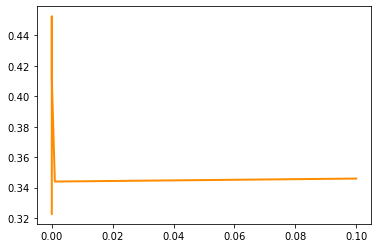

In [28]:
from sklearn.naive_bayes import GaussianNB 

kf = KFold(n_splits = 10, shuffle=True)

var_smoothing = [1e-11, 1e-10, 1e-9,1e-8,1e-7,0.001,0.1]
X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)
train2 = []
test2 = []
import time
start = time.time()

for var in var_smoothing:
    train_accuracy_score = []
    test_accuracy_score = []
    for train, test in kf.split(X_train):
        X_train_kf, X_test_kf = X[train],X[test]
        y_train_kf, y_test_kf = y[train],y[test]

        gnb = GaussianNB(var_smoothing=var).fit(X_train_kf, y_train_kf) 
        accuracy2 = gnb.score(X_test_kf, y_test_kf)
        accuracy = gnb.score(X_train_kf, y_train_kf)
        
        train_accuracy_score.append(accuracy)
        test_accuracy_score.append(accuracy2)
    test2.append(np.mean(test_accuracy_score))
    train2.append(np.mean(train_accuracy_score))
end = time.time()
print(end-start)
lw=2
plt.figure()
plt.plot(var_smoothing, test2, color='darkorange',
             lw=lw, label='Train Accuracy')
plt.plot(var_smothiing, train2, color='darkblue',
             lw=lw, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('CV Accuracy')
plt.title('Naive Bayes Hyperparameter Training')
plt.legend()
plt.show()


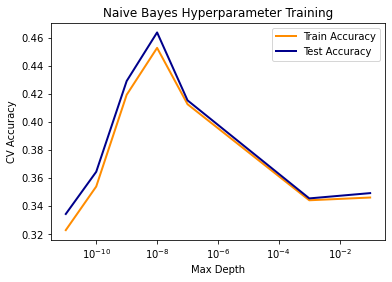

In [32]:
lw=2
plt.figure()
plt.plot(var_smoothing, test2, color='darkorange',
             lw=lw, label='Train Accuracy')
plt.plot(var_smoothing, train2, color='darkblue',
             lw=lw, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('CV Accuracy')
plt.title('Naive Bayes Hyperparameter Training')
plt.legend()
plt.xscale("log")
plt.show()


In [16]:
test2[3]

0.45646370118295254

In [17]:
gnb = GaussianNB(var_smoothing=10e-8).fit(X, y) 

In [18]:
y_pred1=gnb.predict(X_test)

In [20]:
test_labels['price'] = y_pred1
test_labels

,id,price
0,7715,2
1,13196,2
2,13194,2
3,4673,2
4,11325,2
...,...,...
4144,12921,2
4145,7174,2
4146,9240,2
4147,11663,1


In [21]:
test_labels.to_csv(r'./submission19.csv', index=False)

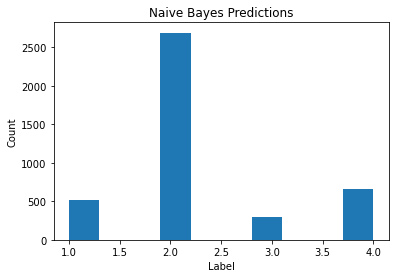

In [24]:
plt.figure()
plt.hist(y_pred1)
plt.title("Naive Bayes Predictions")
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()
